<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Multilayer Perceptron Models with Keras</h2>

## Task 1: Project Overview and Import Modules

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.4.0


## Task 2: Load the Reuters Dataset

In [27]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split = 0.2)

In [28]:
print(len(x_train), 'training_examples')
print(len(x_test), 'test_examples')

8982 training_examples
2246 test_examples


In [29]:
num_class = np.max(y_train) + 1
print(num_class, 'classes')

46 classes


## Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [30]:
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode = 'binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode = 'binary')
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [31]:
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test =tf.keras.utils.to_categorical(y_test, num_class)
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

## Task 4: Build Multilayer Perceptron Model

In [32]:
model = Sequential([
    Dense(512, input_shape = (10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_class),
    Activation('softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5120512   
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_5 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## Task 5: Train Model

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', verbose=1,mode='min')

model.compile(optimizer = 'adam',
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [34]:
history = model.fit(x_train, y_train, 
                    epochs=100,
                    batch_size=32,
                    validation_split = 0.1,
                    callbacks=[es])

Epoch 1/100
253/253 [==============================] - 14s 51ms/step - loss: 1.7730 - accuracy: 0.6224 - val_loss: 0.9279 - val_accuracy: 0.7998
Epoch 2/100
253/253 [==============================] - 13s 52ms/step - loss: 0.4868 - accuracy: 0.8899 - val_loss: 0.8573 - val_accuracy: 0.8142
Epoch 3/100
253/253 [==============================] - 14s 54ms/step - loss: 0.2778 - accuracy: 0.9371 - val_loss: 0.8814 - val_accuracy: 0.8131
Epoch 00003: early stopping


## Task 6: Evaluate Model on Test Data

In [36]:
model.evaluate(x_test, y_test, batch_size=32, verbose = 1)

71/71 [==============================] - 1s 12ms/step - loss: 0.8816 - accuracy: 0.8094


[0.8816148638725281, 0.8094390034675598]

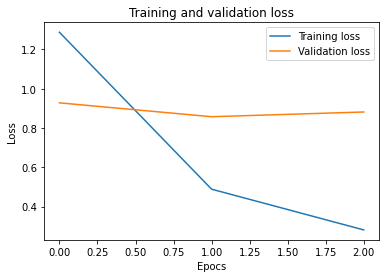

In [37]:
plt.plot(history.history['loss'], label = "Training loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epocs')
plt.ylabel('Loss')
plt.legend()
plt.show()

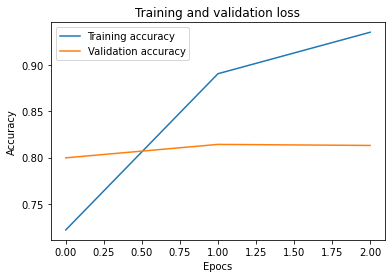

In [38]:
plt.plot(history.history['accuracy'], label = "Training accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.title('Training and validation loss')
plt.xlabel('Epocs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()